<a href="https://colab.research.google.com/github/Shaunak-1/Expectation-Maximization-Algorithm-for-Censored-Survival-data/blob/main/em.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

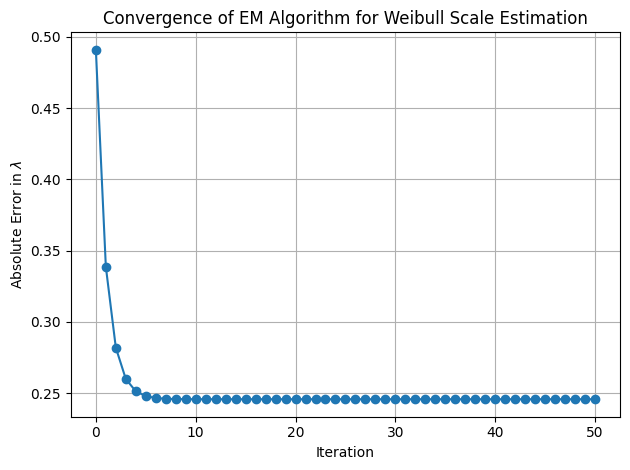

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.special import gamma, gammaincc

# True Weibull parameters
k = 2.0
lambda_true = 1.5
n = 100

# Generate lifetime data
T = weibull_min.rvs(c=k, scale=lambda_true, size=n)

# Generate censoring data
C = np.random.uniform(0.5, 2.5, size=n)
observed = T <= C
censored = ~observed

t_obs = T[observed]
cens_times = C[censored]

m = len(t_obs)
r = len(cens_times)

# Initial guess as mean of uncensored data
lambda_est = np.mean(t_obs)
errors = [abs(lambda_est - lambda_true)]

max_iter = 50

for _ in range(max_iter):
    # Observed term
    S_obs = np.sum(t_obs ** k)

    # Censored term
    S_cens = 0.0
    for c in cens_times:
        x = (c / lambda_est) ** k
        incomplete_gamma = gamma(1 + 1/k) * gammaincc(1 + 1/k, x)
        survival = np.exp(-x)
        E_Tk = lambda_est**k * incomplete_gamma / survival
        S_cens += E_Tk

    S = S_obs + S_cens

    # M-step
    lambda_new = (S / n) ** (1 / k)
    errors.append(abs(lambda_new - lambda_true))

    lambda_est = lambda_new

# Plotting convergence
plt.plot(errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error in $\\lambda$')
plt.title('Convergence of EM Algorithm for Weibull Scale Estimation')
plt.grid(True)
plt.tight_layout()
plt.show()
